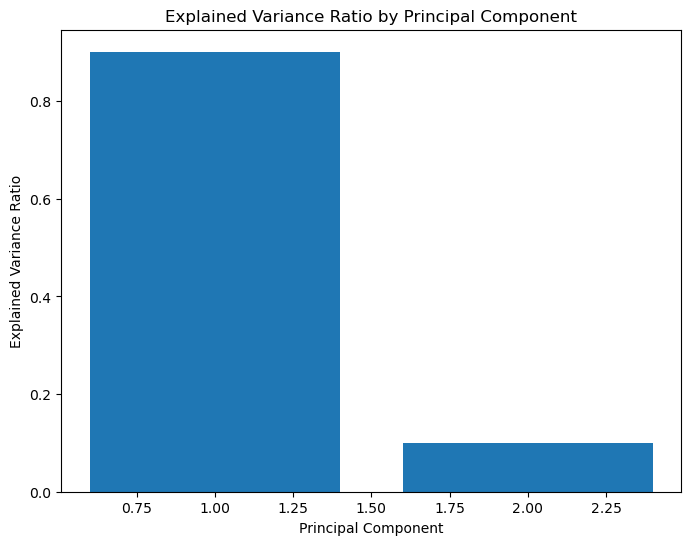

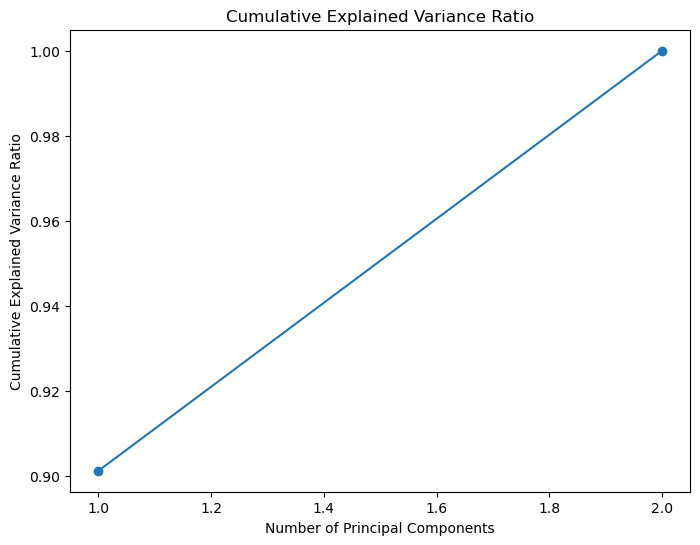

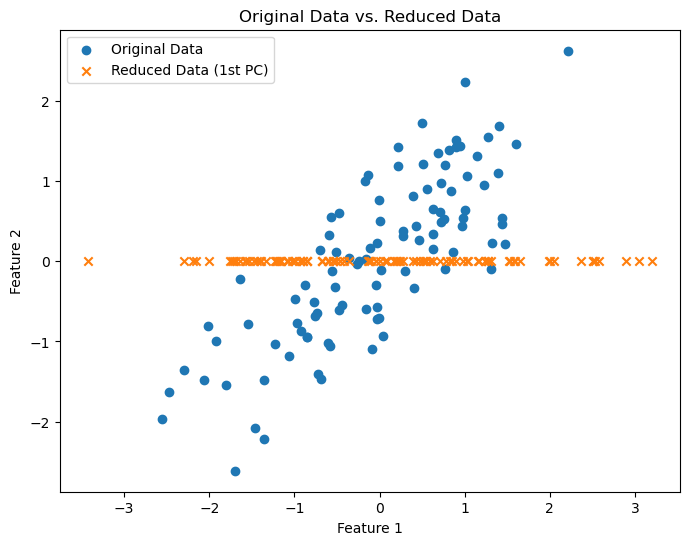

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
data = np.random.multivariate_normal(mean, cov, 100)

# Step 1: Center the data
mean_vec = np.mean(data, axis=0)
centered_data = data - mean_vec

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Step 3: Perform SVD
U, S, Vt = np.linalg.svd(cov_matrix)

# Step 4: Select Principal Components
explained_variance_ratio = S / np.sum(S)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Step 5: Dimensionality Reduction
k = 1  # Number of principal components
reduced_data = centered_data.dot(Vt[:k, :].T)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Plot cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

# Plot original data and reduced data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.scatter(reduced_data[:, 0], np.zeros_like(reduced_data[:, 0]), label='Reduced Data (1st PC)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Original Data vs. Reduced Data')
plt.show()
